# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load and Explore the Dataset
*	Read the dataset.
*	Display the first few rows.
*	Check for missing values and unique crop types.

In [2]:
# Load dataset
crops = pd.read_csv("/content/soil_measures.csv")

# Display first few rows
print("Dataset Preview:\n", crops.head())

Dataset Preview:
     N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [3]:
# Check for missing values
print("\nMissing Values:\n", crops.isna().sum())


Missing Values:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [4]:
# Check unique crops
print("\nUnique Crop Types:\n", crops["crop"].unique())


Unique Crop Types:
 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


#  Exploratory Data Analysis (EDA)
We visualize the data to understand the distribution of soil features.
## 1 Visualize Feature Distributions


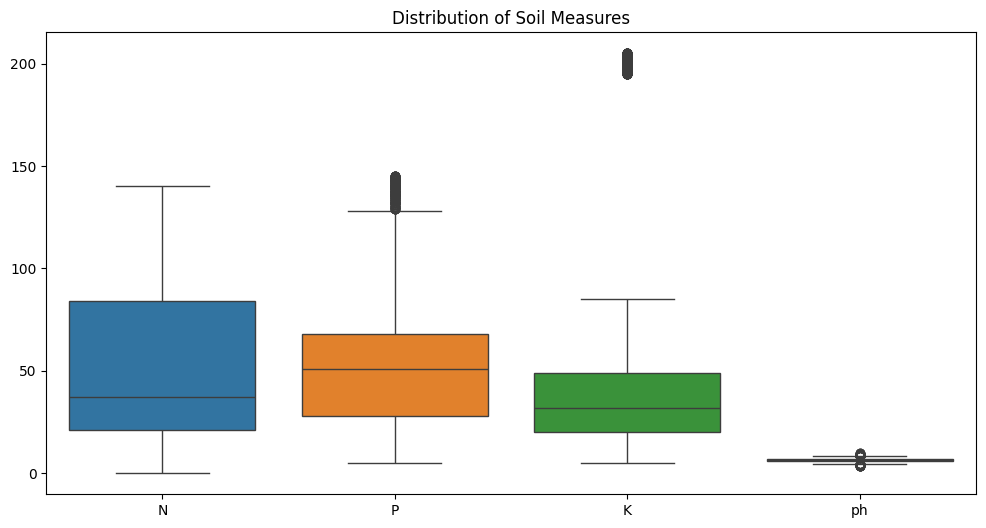

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=crops.drop(columns=['crop']))
plt.title("Distribution of Soil Measures")
plt.show()

## 2 Pairplot to Show Relationships

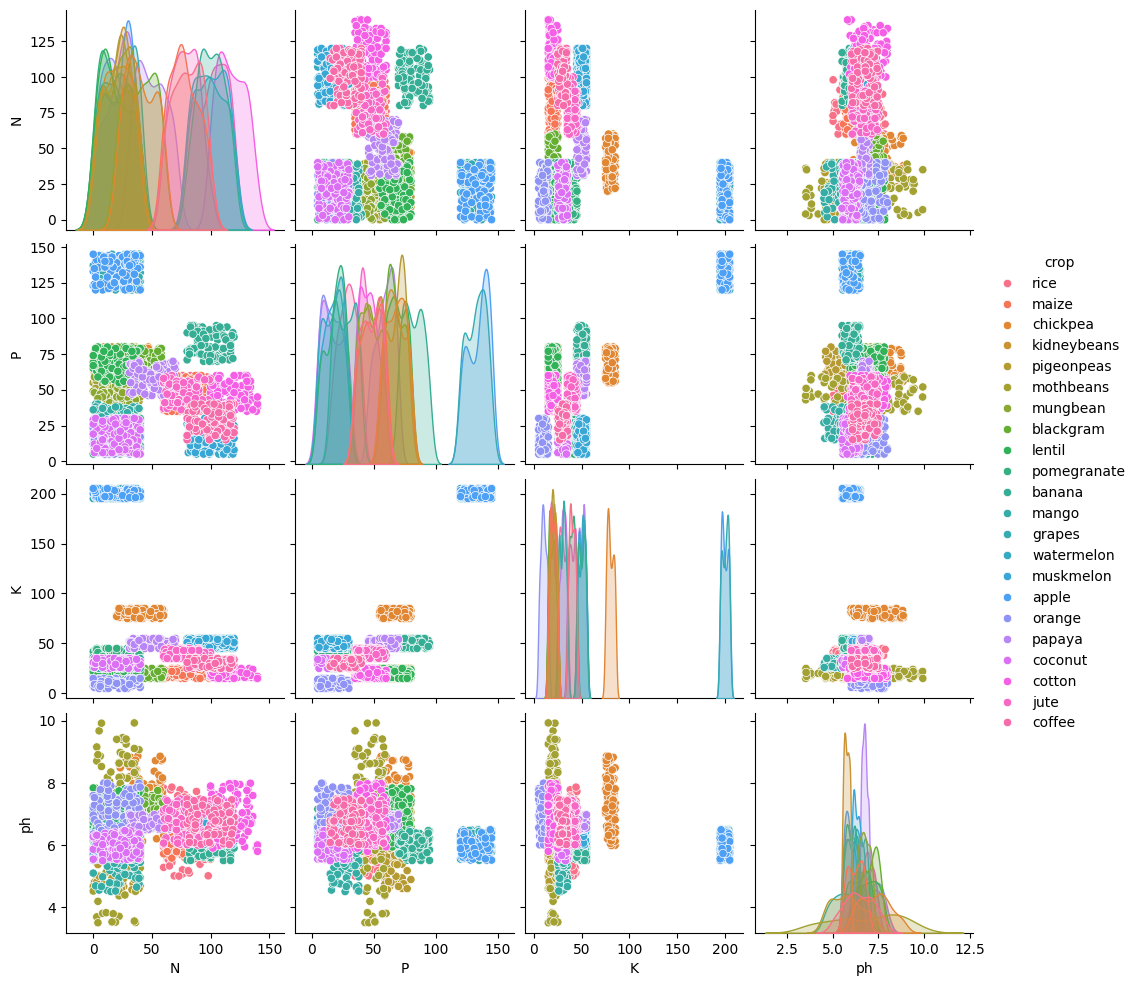

In [6]:
sns.pairplot(crops, hue="crop", palette="husl")
plt.show()

## 3 Correlation Heatmap

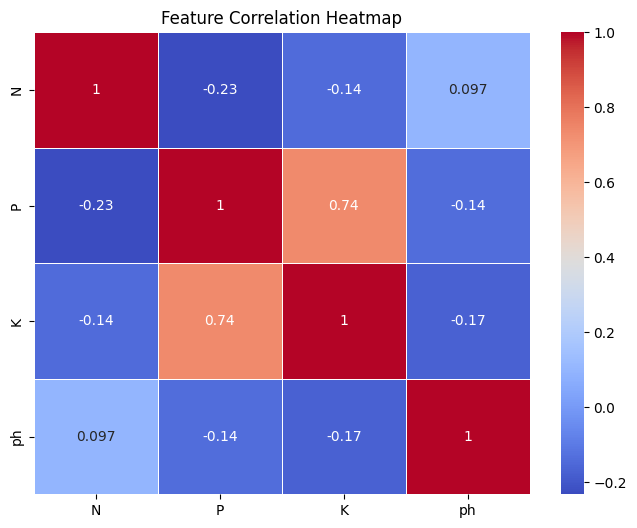

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(crops.drop(columns=["crop"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing
*	Encode categorical labels.
*	Split data into training and testing sets.


In [8]:
# Encode the target variable (crop)
label_encoder = LabelEncoder()
crops["crop"] = label_encoder.fit_transform(crops["crop"])

# Define features and target
X = crops.drop(columns=["crop"])
y = crops["crop"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate Feature Performance
We evaluate each feature individually by training Logistic Regression models.

In [9]:
# Dictionary to store feature performance
feature_performance = {}

# Standardizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate each feature individually
for feature in X.columns:
    model = LogisticRegression(solver="lbfgs", max_iter=1000)

    # Extract single feature and reshape for model input
    X_train_feature = X_train_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1)
    X_test_feature = X_test_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1)

    model.fit(X_train_feature, y_train)
    y_pred = model.predict(X_test_feature)

    # Calculate F1-score
    score = f1_score(y_test, y_pred, average="weighted")
    feature_performance[feature] = score
    print(f"F1-score for {feature}: {score}")

# Identify best predictive feature
best_feature = max(feature_performance, key=feature_performance.get)
best_predictive_feature = {best_feature: feature_performance[best_feature]}

print("\nBest Predictive Feature:", best_predictive_feature)

F1-score for N: 0.10163179859446461
F1-score for P: 0.13997712003244786
F1-score for K: 0.20227438033488054
F1-score for ph: 0.0753255620774562

Best Predictive Feature: {'K': 0.20227438033488054}


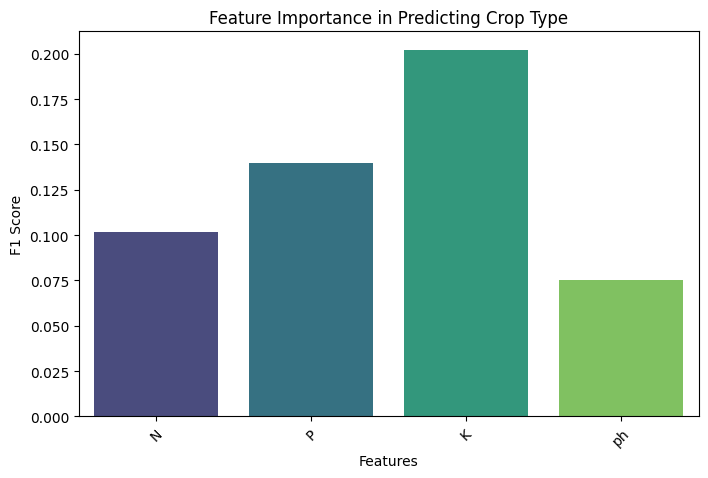

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(feature_performance.keys()), y=list(feature_performance.values()), hue=list(feature_performance.keys()), palette="viridis", legend=False)
plt.xlabel("Features")
plt.ylabel("F1 Score")
plt.title("Feature Importance in Predicting Crop Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#  Implement Hybrid Model for Prediction
*	Use Random Forest and Gradient Boosting.
*	Combine them into a Voting Classifier.


In [11]:
# Define models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Hybrid model using Voting Classifier
hybrid_model = VotingClassifier(estimators=[("Random Forest", rf_model), ("Gradient Boosting", gb_model)], voting="soft")

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred_hybrid = hybrid_model.predict(X_test)

# Model Evaluation
Evaluate accuracy, F1-score, and classification report.


In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_hybrid)
f1 = f1_score(y_test, y_pred_hybrid, average="weighted")

print("\nHybrid Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))


Hybrid Model Performance:
Accuracy: 0.7523
F1 Score: 0.7488

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       1.00      1.00      1.00        20
           2       0.67      0.70      0.68        20
           3       1.00      1.00      1.00        20
           4       0.68      0.65      0.67        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       0.50      0.50      0.50        20
           8       0.62      0.65      0.63        20
           9       0.83      0.95      0.88        20
          10       0.39      0.35      0.37        20
          11       0.95      1.00      0.98        20
          12       0.76      0.65      0.70        20
          13       0.90      0.90      0.90        20
          14       0.86      0.90      0.88        20
          15       0.38      0.30      0.33      

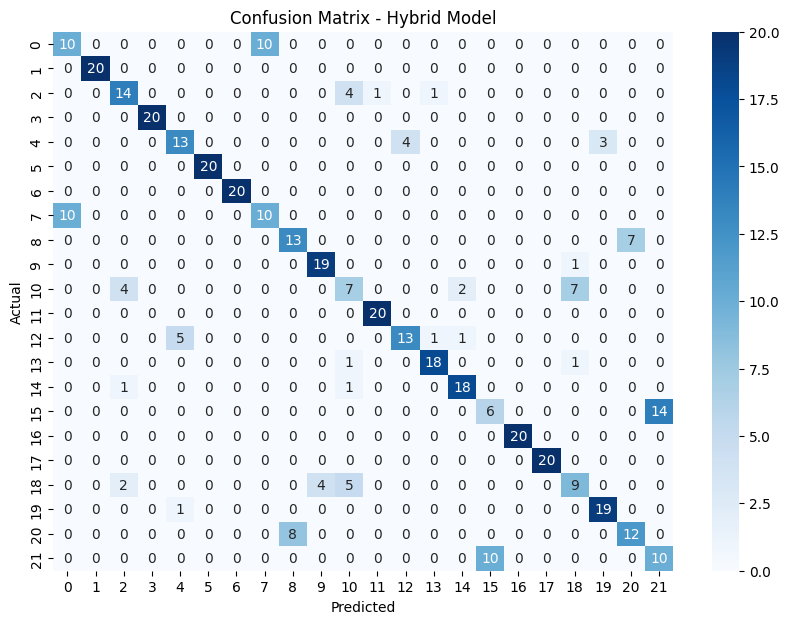

In [13]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_hybrid), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Hybrid Model")
plt.show()

# Predict Future Crops Based on Soil Conditions

In [14]:
# Simulated future soil conditions
future_soil_conditions = pd.DataFrame({
    "N": [30, 50, 80],
    "P": [20, 40, 60],
    "K": [15, 35, 55],
    "pH": [6.0, 6.5, 7.0]
})

# Correct column name to match training data
future_soil_conditions.rename(columns={"pH": "ph"}, inplace=True)

# Predict future crops
future_crop_predictions = hybrid_model.predict(future_soil_conditions)

# Decode predicted crop labels
future_crop_names = label_encoder.inverse_transform(future_crop_predictions)

# Display results
for i, crop in enumerate(future_crop_names, 1):
    print(f"Future Crop Prediction {i}: {crop}")


Future Crop Prediction 1: orange
Future Crop Prediction 2: blackgram
Future Crop Prediction 3: papaya


# Compare Model Performance
Plot performance comparison between individual and hybrid models.


In [15]:
# Define model performances
model_scores = {
    "Random Forest": accuracy_score(y_test, rf_model.fit(X_train, y_train).predict(X_test)),
    "Gradient Boosting": accuracy_score(y_test, gb_model.fit(X_train, y_train).predict(X_test)),
    "Hybrid Model": accuracy  # Ensure 'accuracy' is defined earlier
}

# Print model scores
print(model_scores)

{'Random Forest': 0.7454545454545455, 'Gradient Boosting': 0.75, 'Hybrid Model': 0.7522727272727273}


<ipython-input-16-465593216be9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=scores_df, palette="coolwarm")


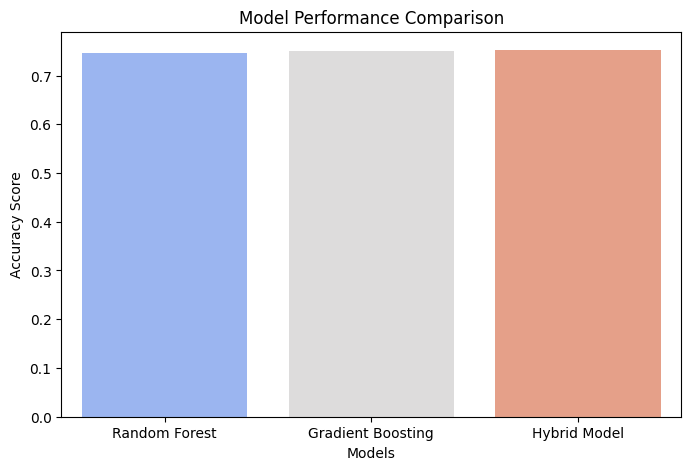

In [16]:
# Convert to DataFrame for better visualization
scores_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])

# Plot model performances
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=scores_df, palette="coolwarm")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()